In [2]:
# Import the Packages

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score ,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN

In [4]:
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Datasets\\kc_house_data.csv'
df = pd.read_csv(file_path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.shape

(21613, 21)

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


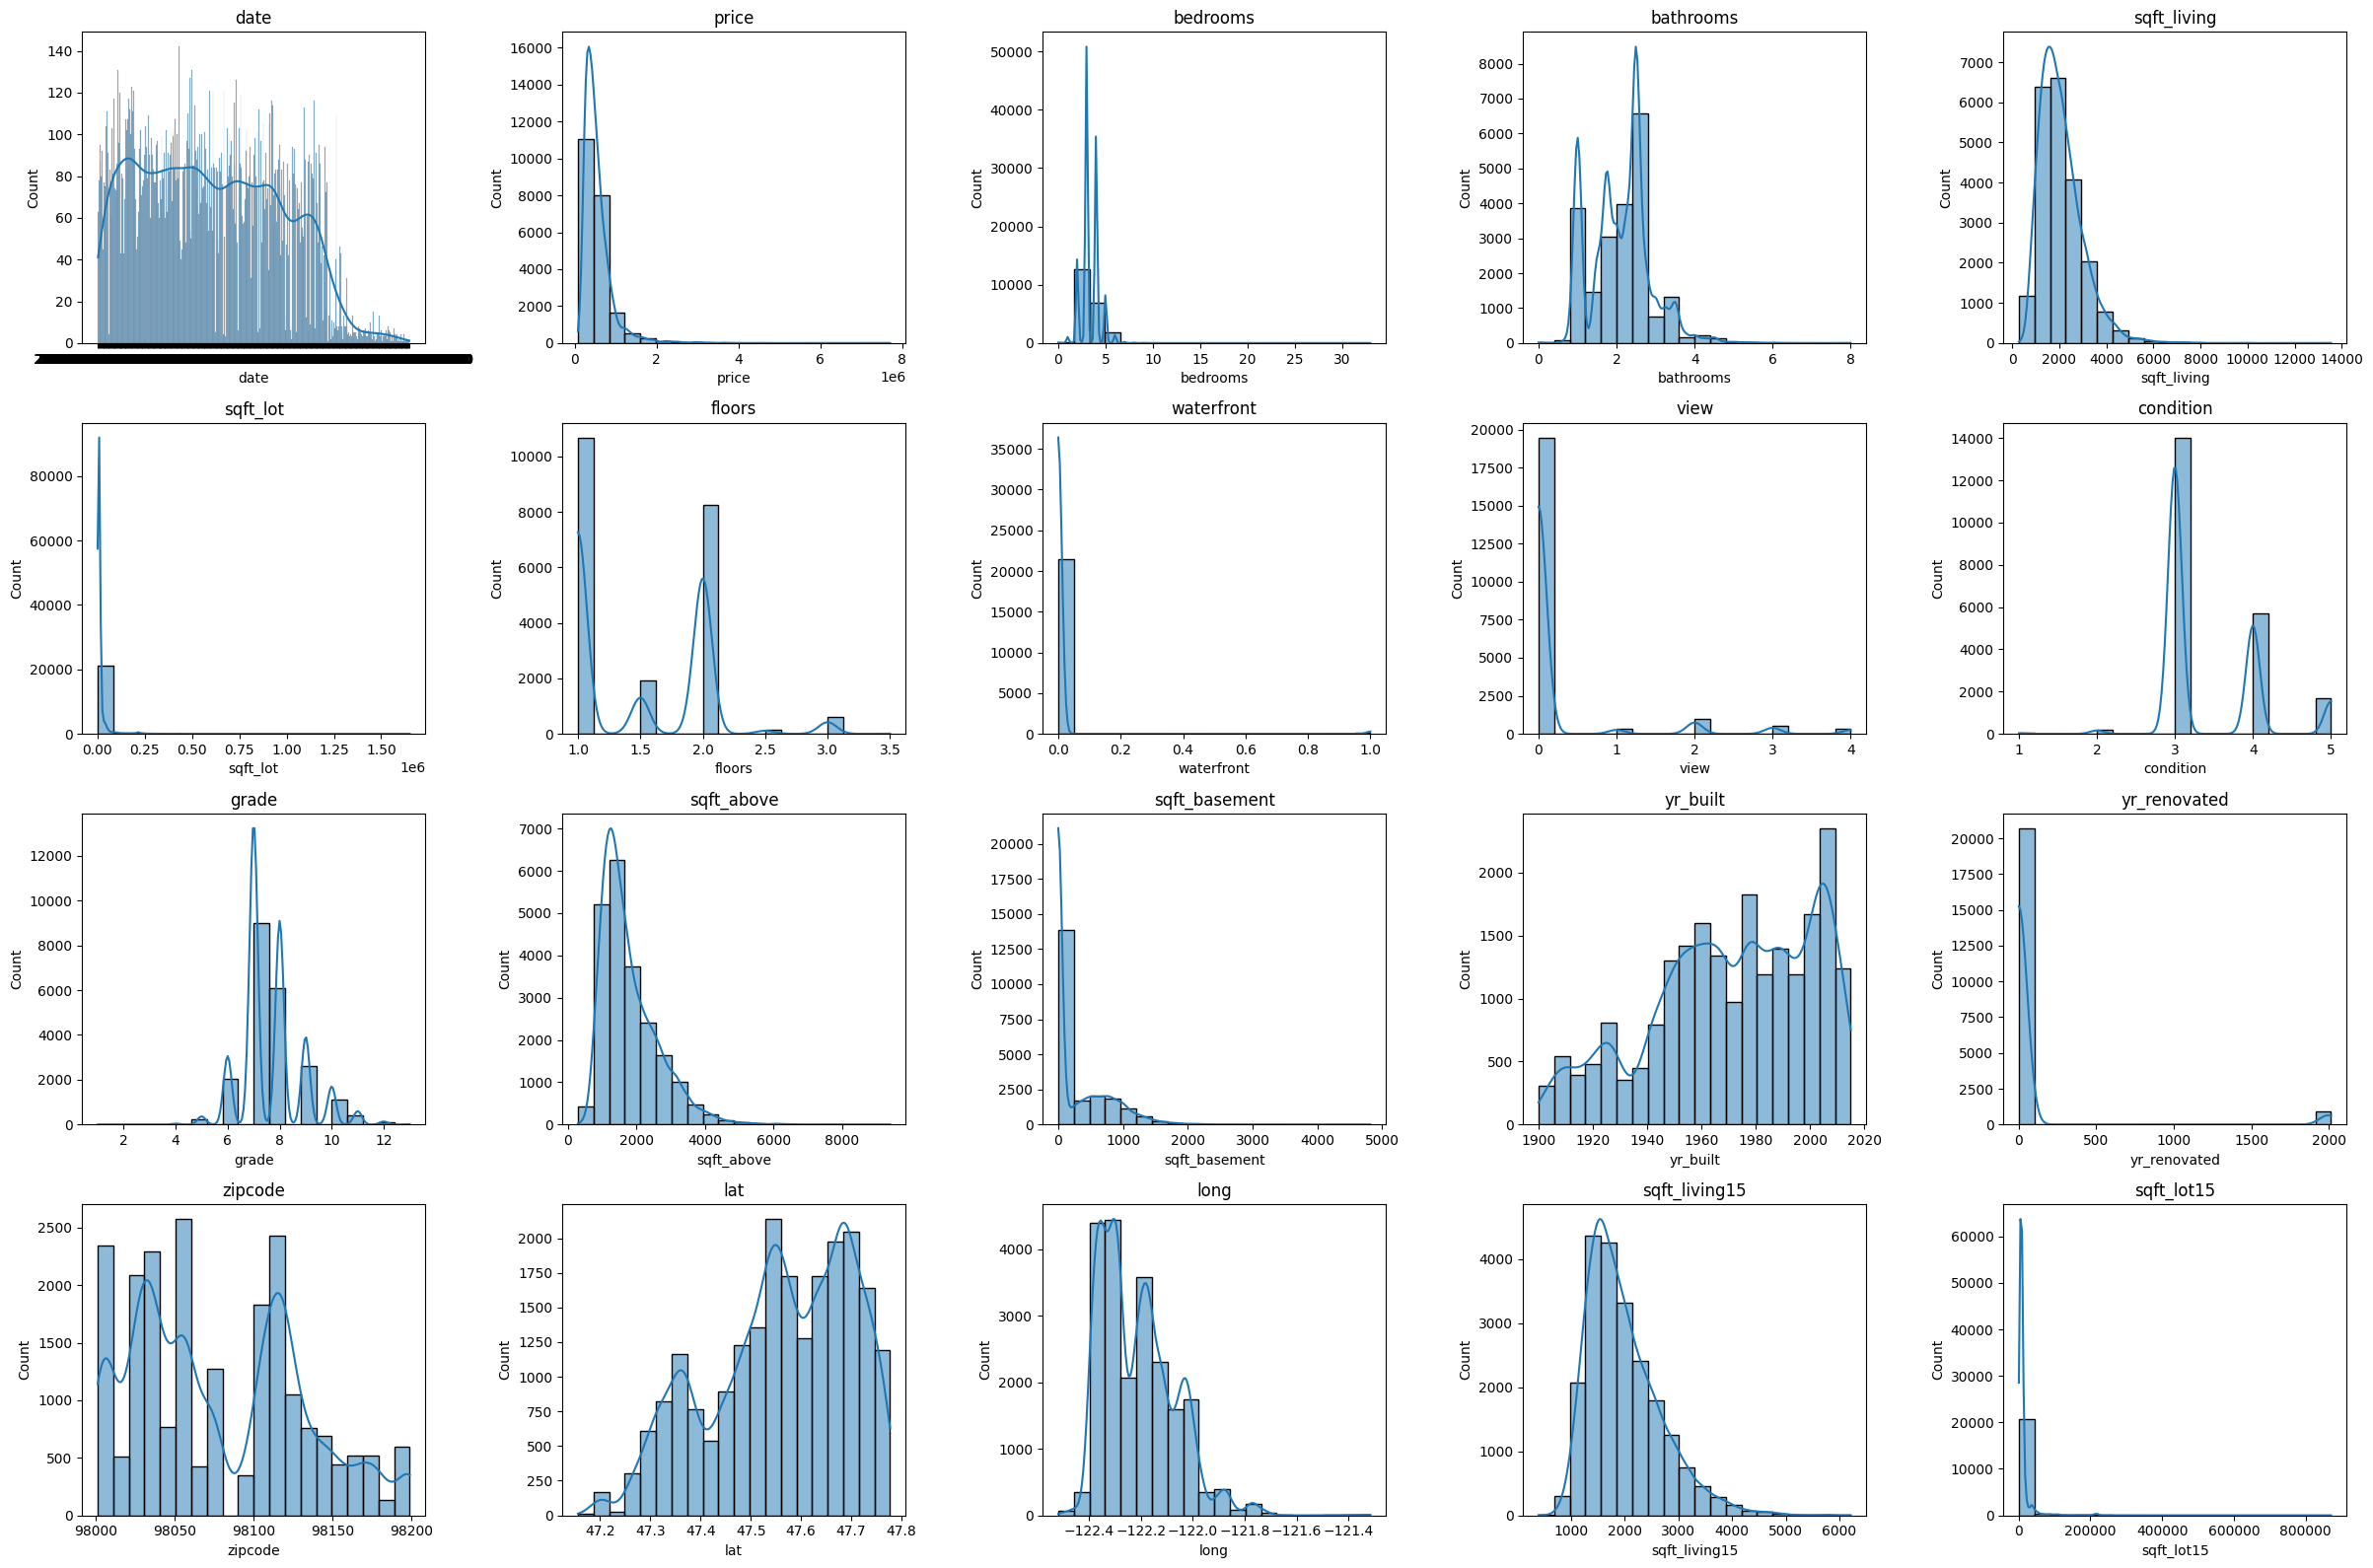

In [13]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [14]:
df["waterfront"].value_counts().reset_index()

,waterfront,count
0,0,21450
1,1,163


In [15]:
df["view"].value_counts().reset_index()

,view,count
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


In [16]:
df["yr_renovated"].value_counts().reset_index()

,yr_renovated,count
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35
...,...,...
65,1951,1
66,1959,1
67,1948,1
68,1954,1


In [17]:
df.drop(["waterfront","view","zipcode","yr_renovated"],axis =1 ,inplace = True)

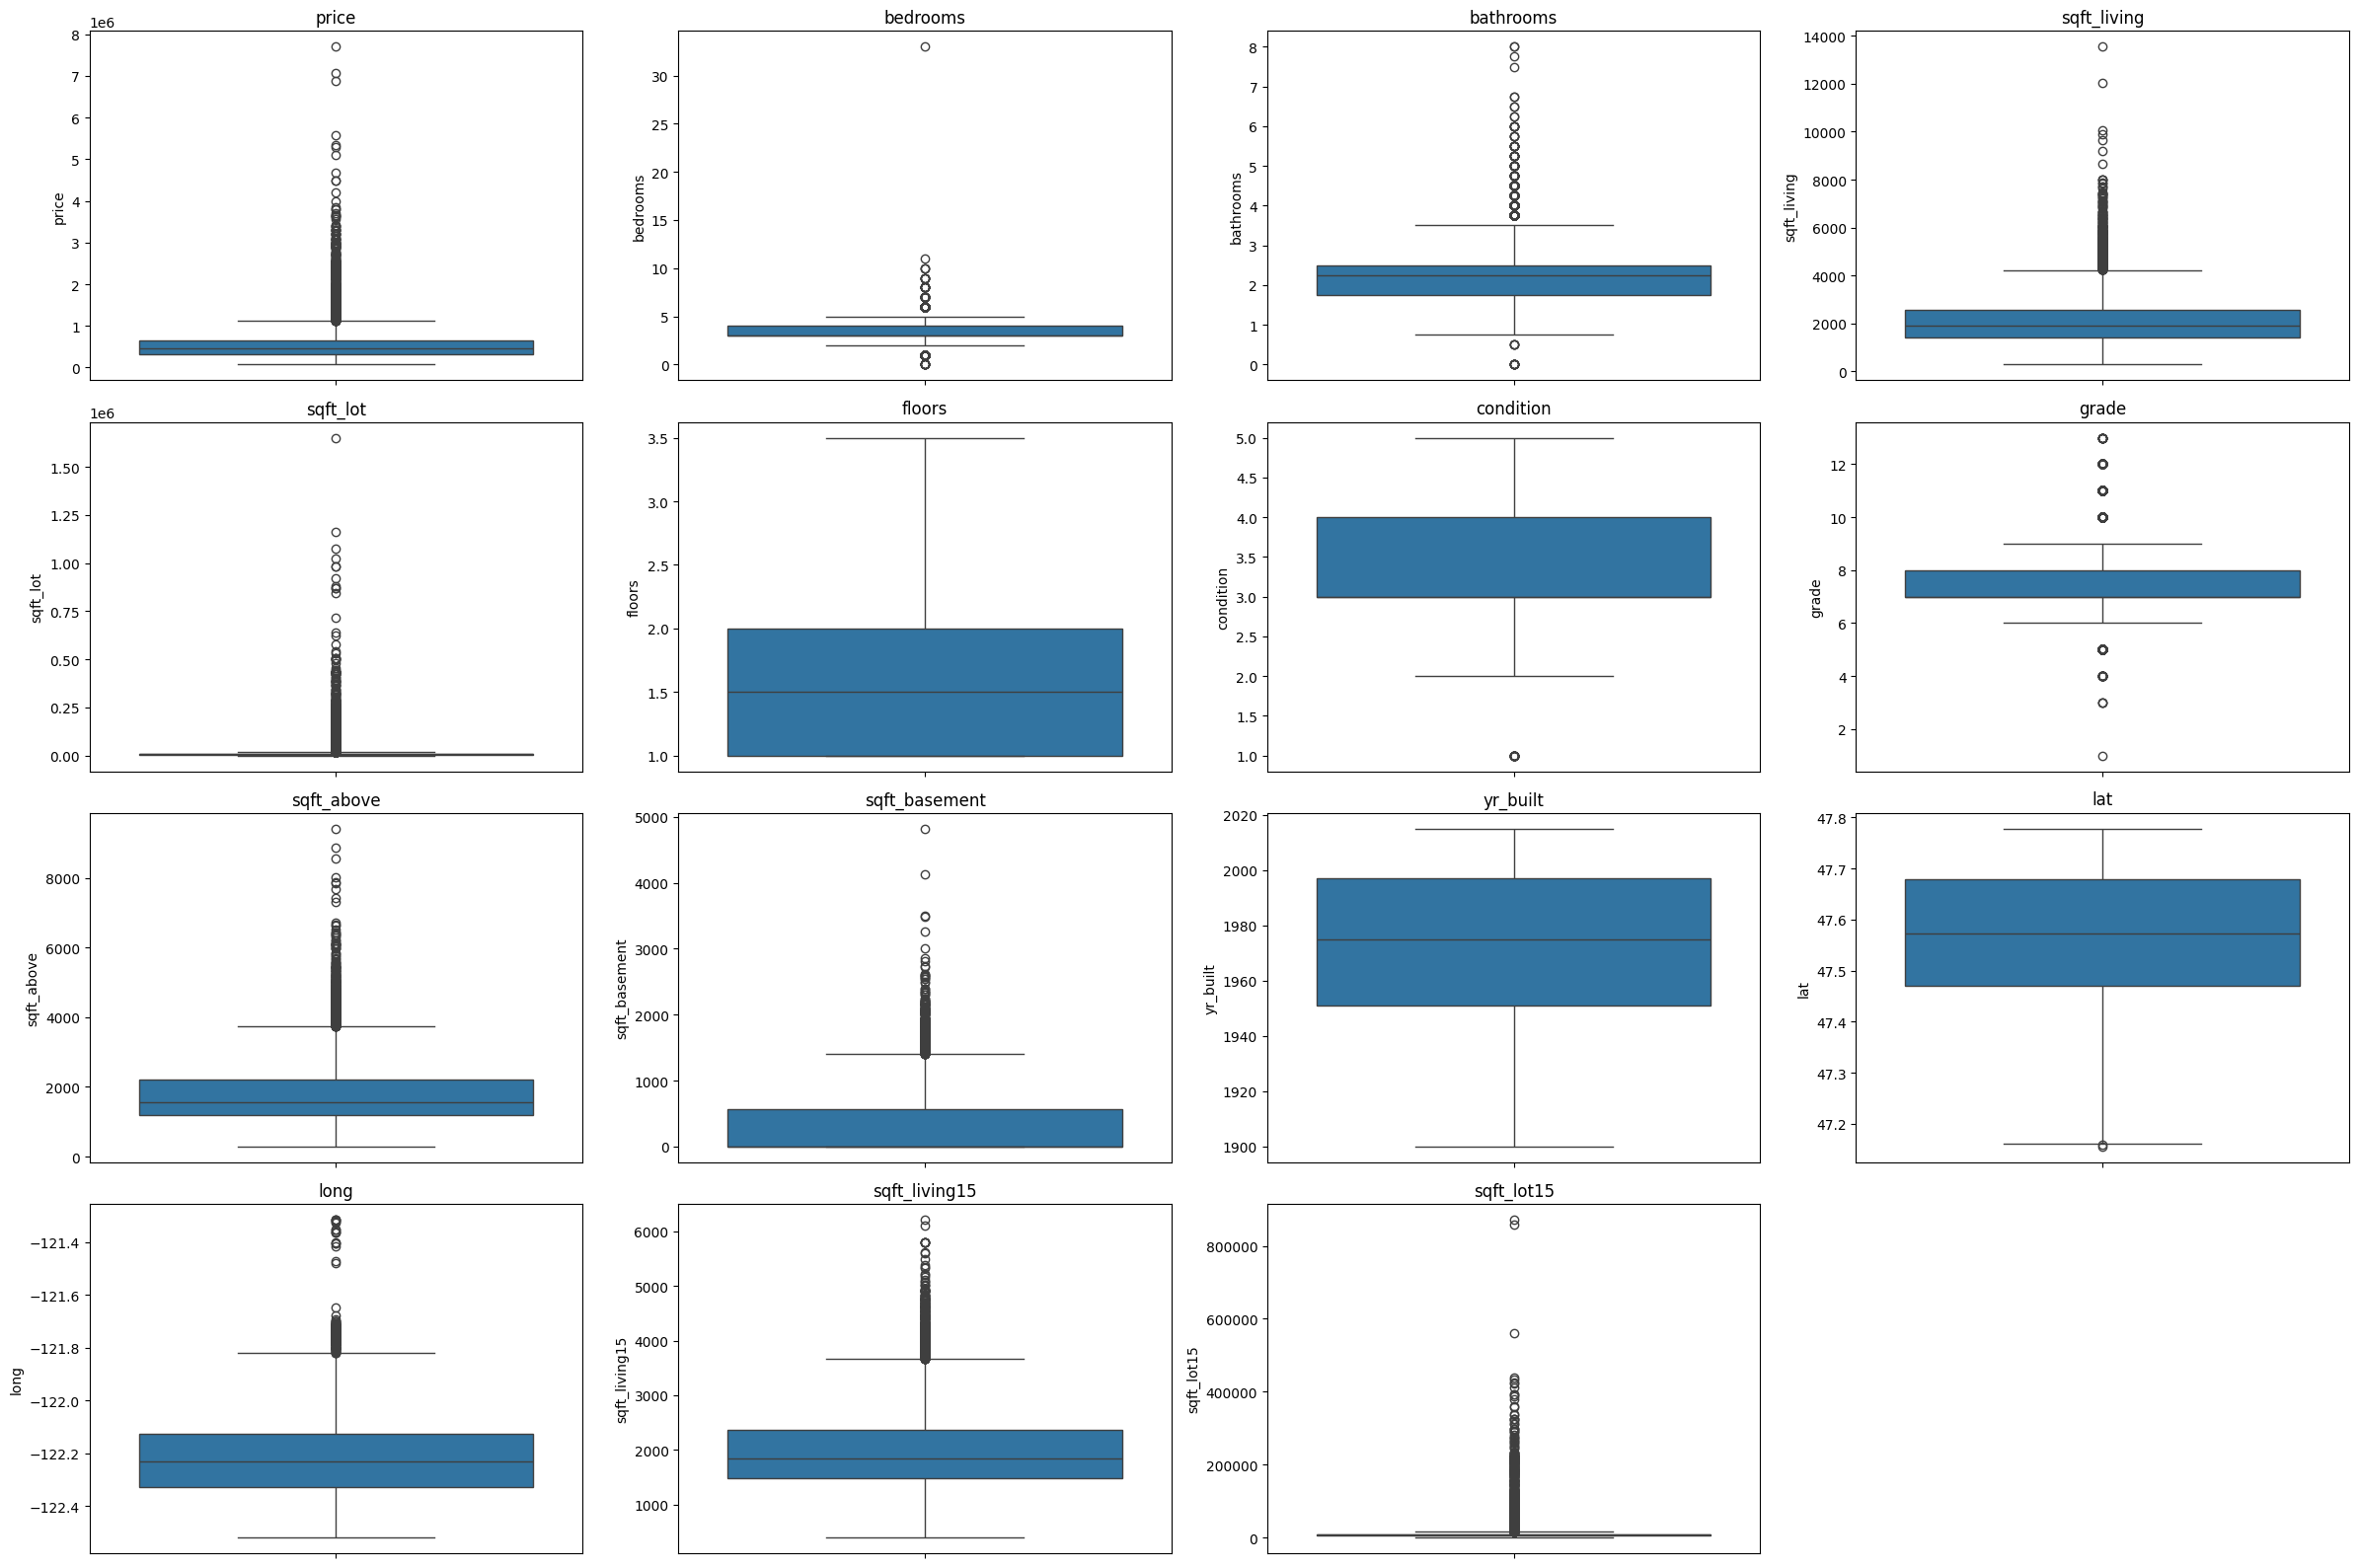

In [18]:
plt.figure(figsize=(24, 16))
for feature in df.drop('date',axis=1).columns.to_list():
    plt.subplot(4, 4, df.columns.to_list().index(feature))
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [19]:
# Scaling Data with Standard Scaler

In [20]:
datetime_column = df['date']  # Save the datetime column separately


numeric_columns = df.drop(["grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]
# Apply RobustScaler to numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Combine scaled numeric data with the datetime column
scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

In [21]:
# Apply Power Transformers(yeo-johnson)

In [22]:
numeric_data = scaled_df[numeric_columns]

# Apply RobustScaler to numeric data
transformer = PowerTransformer(method = "yeo-johnson")
transformed_numeric_data = transformer.fit_transform(numeric_data)

# Combine scaled numeric data with the datetime column
transformed_df = pd.DataFrame(transformed_numeric_data, columns=numeric_columns)
transformed_df['date'] = datetime_column 
transformed_df[['grade','condition','floors','bathrooms','bedrooms']] = df[['grade','condition','floors','bathrooms','bedrooms']]

In [23]:
# Remove Outliers

In [24]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1 
    
    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5
    
    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    
    return ls

In [25]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date',
       'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [26]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(transformed_df,featsure))

In [27]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [28]:
transformed_df = remove(transformed_df,index_list)

In [29]:
transformed_df.shape

(20698, 16)

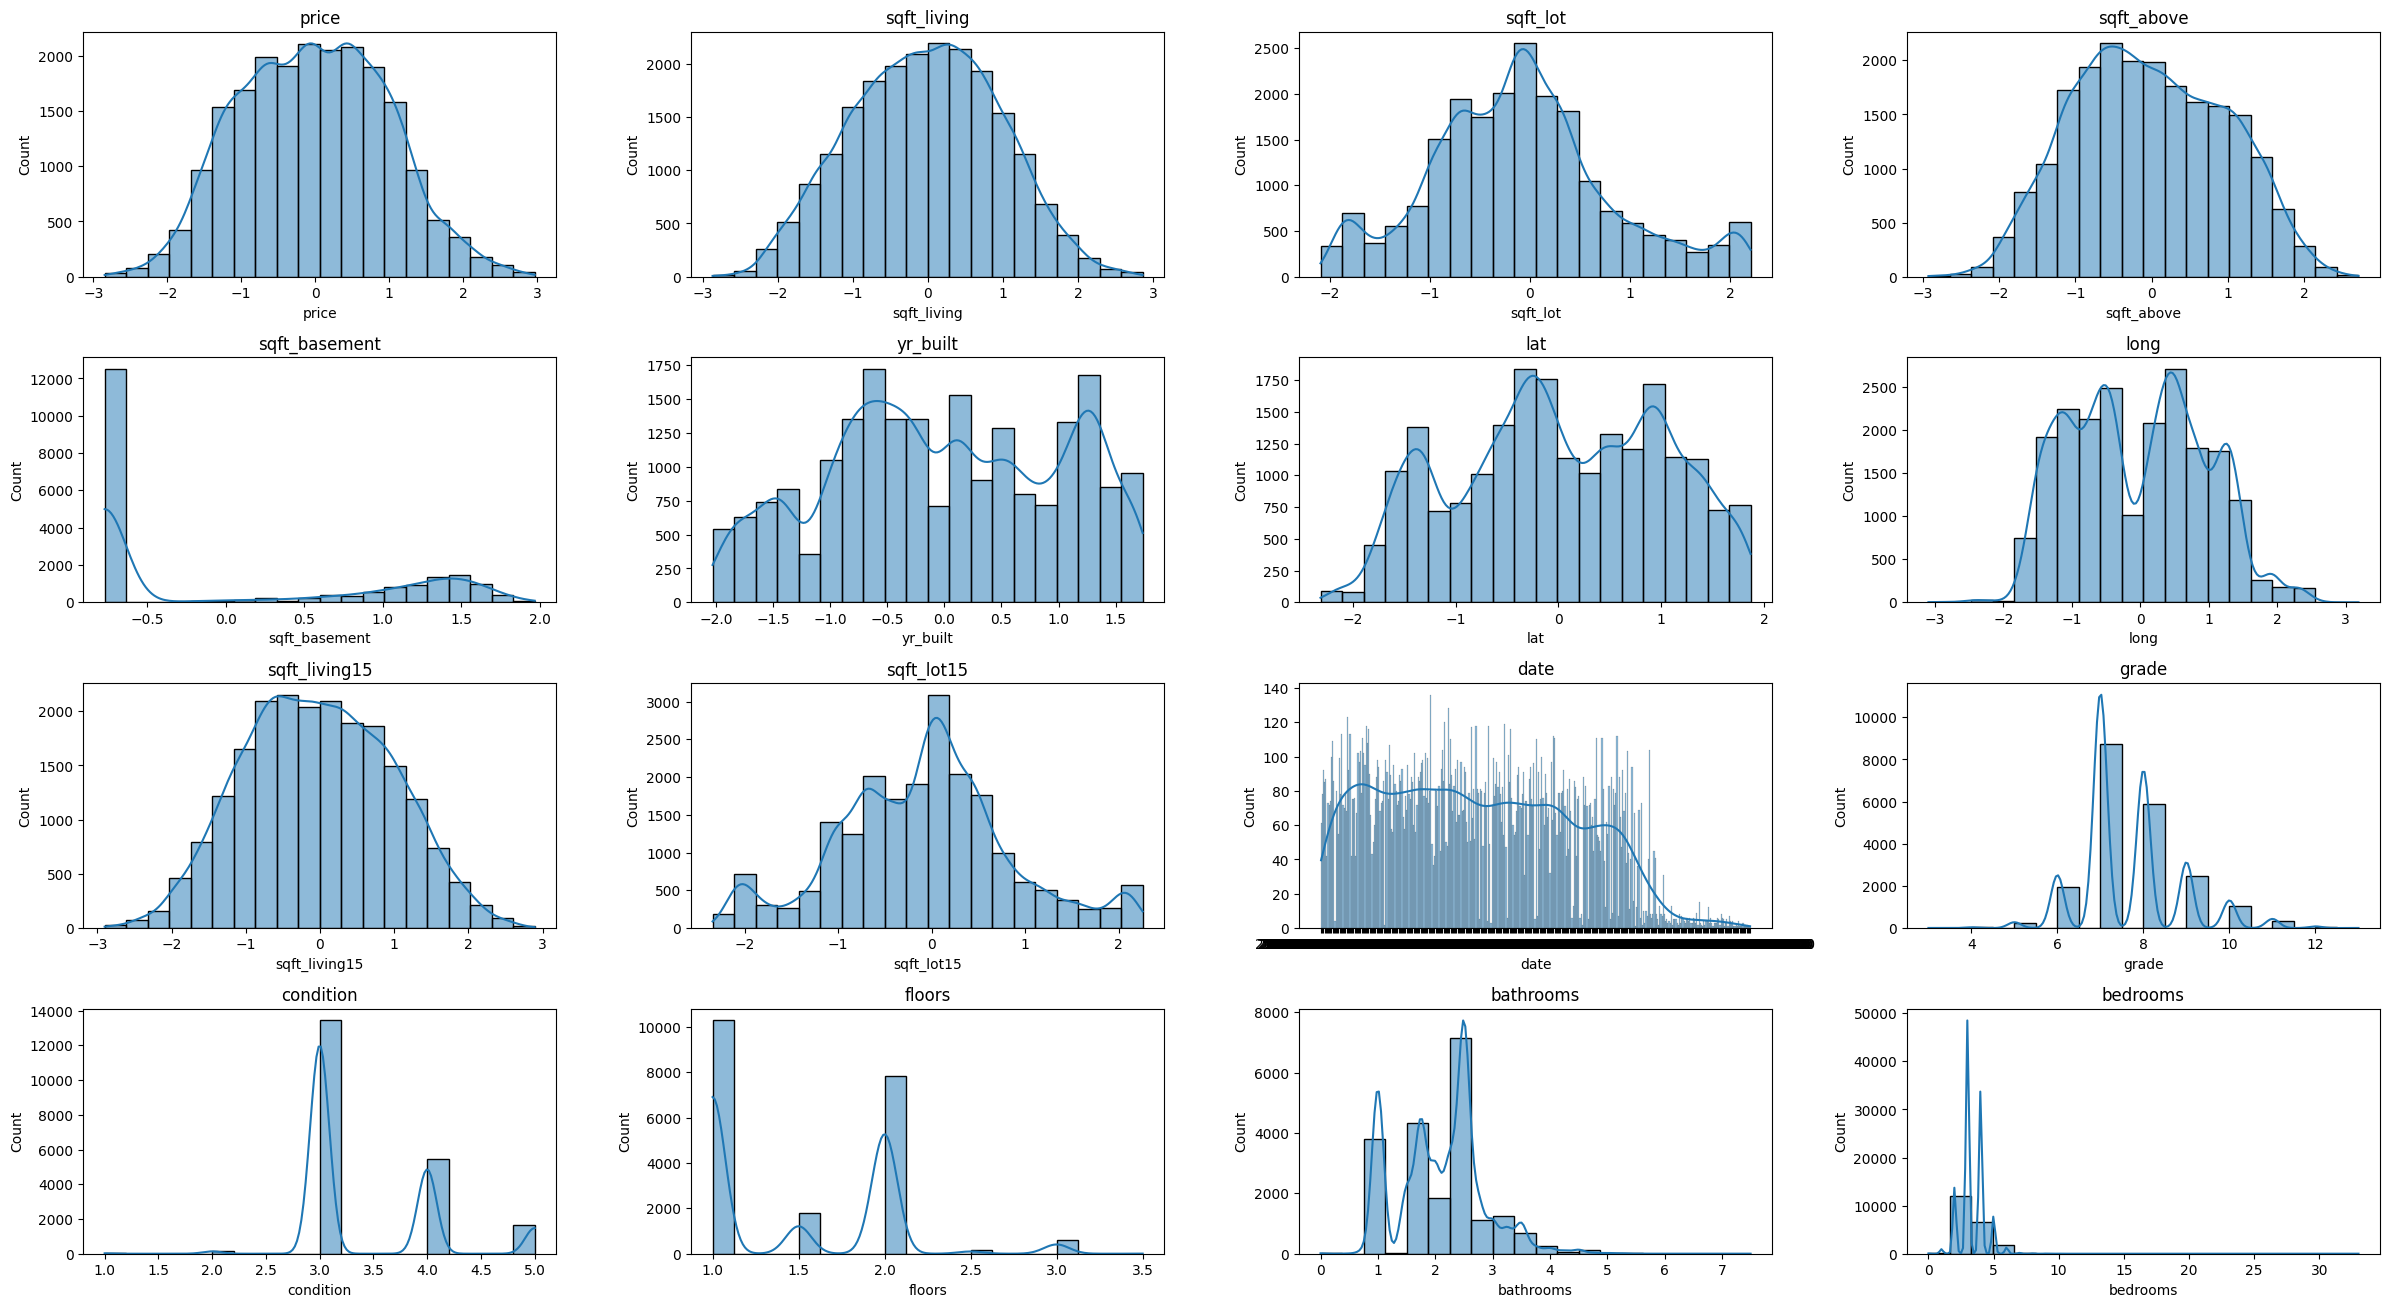

In [30]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=transformed_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

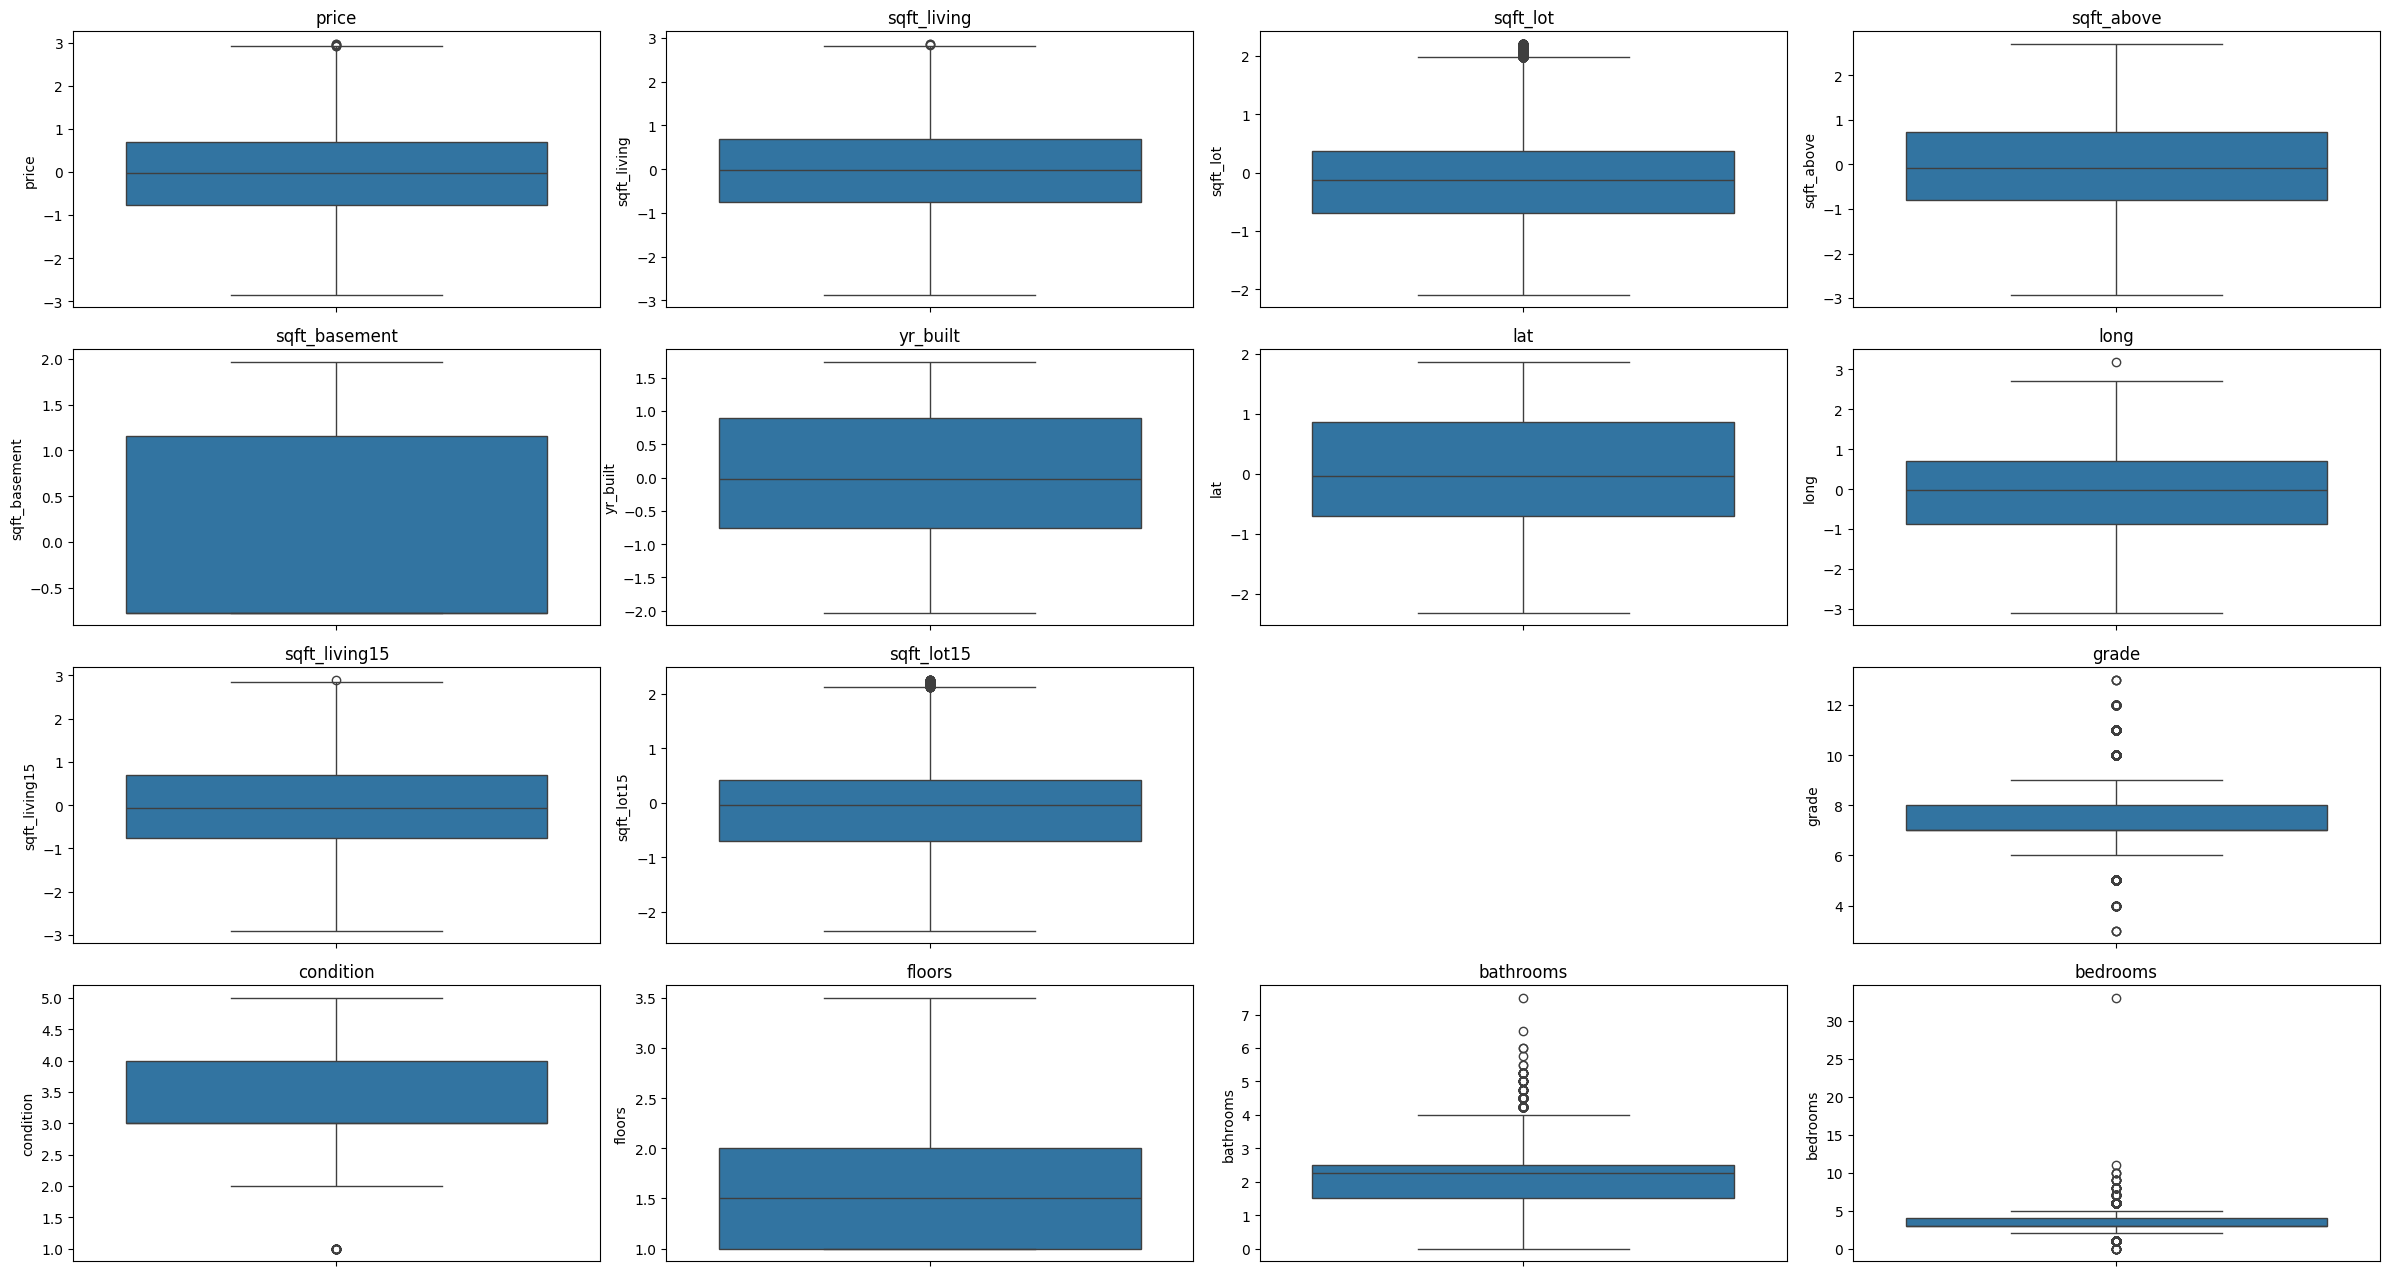

In [31]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.drop('date',axis=1).columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature)+1)
    sns.boxplot(data=transformed_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [32]:
# Heat Map

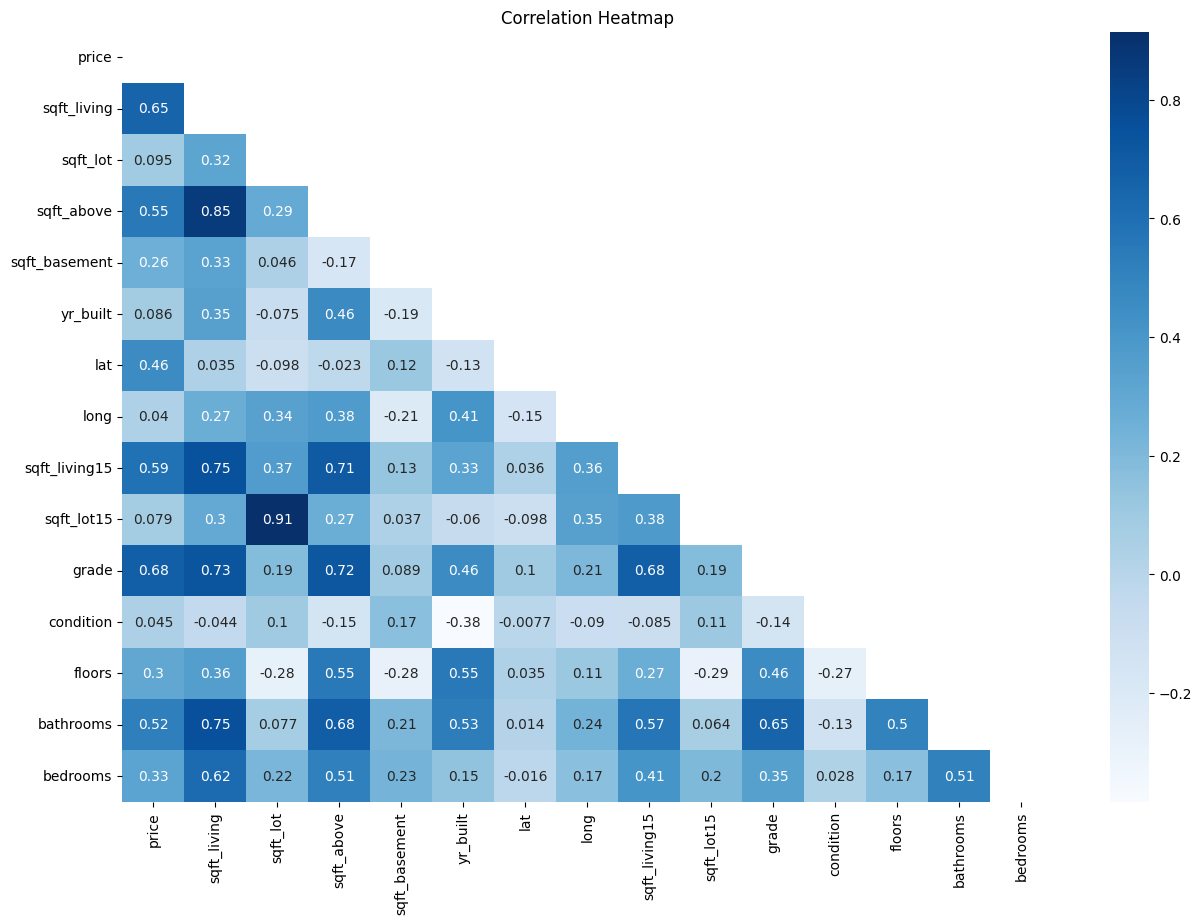

In [34]:
numeric_columns = transformed_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date',
       'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [36]:
print(transformed_df['sqft_living'].corr(transformed_df['price']))
print(transformed_df['sqft_above'].corr(transformed_df['price']))

0.6547539060821369
0.5519342313668023


In [37]:
print(transformed_df['sqft_living15'].corr(transformed_df['price']))
print(transformed_df['sqft_living'].corr(transformed_df['price']))

0.5892074649206603
0.6547539060821369


In [38]:
print(transformed_df['sqft_lot'].corr(transformed_df['price']))
print(transformed_df['sqft_lot15'].corr(transformed_df['price']))

0.0952106190661322
0.07908042092959089


In [39]:
#'sqft_above','sqft_living15','grade','bathrooms'
transformed_df.drop(['sqft_above','sqft_living15','sqft_lot15','date'],axis=1,inplace=True)

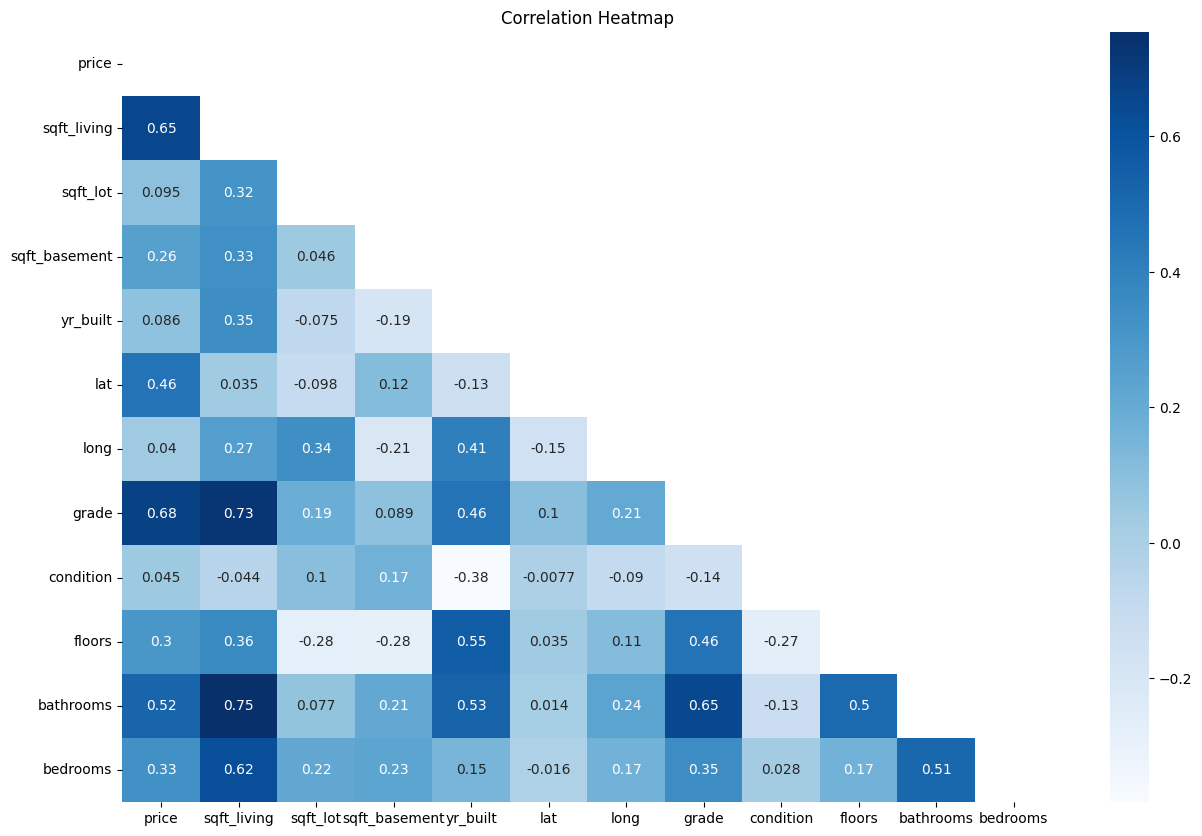

In [40]:
# after delete the column that have hige correlation 
correlation_matrix = transformed_df.corr()
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Split the Data

In [42]:
target = 'price'
X = transformed_df.drop(columns=[target])
y = transformed_df[target]

In [43]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.25 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15523, 11)
y_train shape: (15523,)
X_test shape: (5175, 11)
y_test shape: (5175,)


In [44]:
# Linear Regression

In [45]:
Lrg = LinearRegression()
Lrg.fit(X_train , y_train)

LinearRegression()

In [46]:
y_pred = Lrg.predict(X_test)

In [47]:
Lrg.score(X_train , y_train)

0.7268858890161438

In [48]:
Lrg.score(X_test , y_test)

0.7301491589316691

In [49]:
# r2_score
r2=r2_score(y_test , y_pred)
print("Test Accuracy:", round(r2, 4))

Test Accuracy: 0.7301


In [50]:
# mean_absolute_error
mae=mean_absolute_error(y_test , y_pred)
print("Test Accuracy:", round(mae, 4))

Test Accuracy: 0.4058


In [51]:
# mean_squared_error
mean_squared_error=mean_squared_error(y_test , y_pred)
print("Test Accuracy:", round(mean_squared_error, 4))

Test Accuracy: 0.2672


In [52]:
# cross_val_score
cv=cross_val_score(Lrg, X, y,cv=5) 
cv

array([0.72481897, 0.71633168, 0.72268783, 0.72871558, 0.72896409])

In [53]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.7243036339423046


Text(0.5, 1.0, 'linear Regresion')

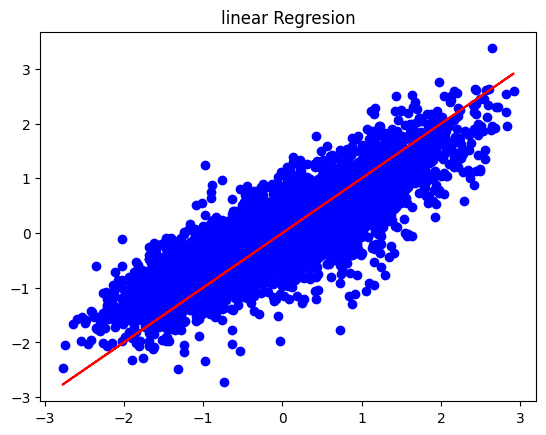

In [54]:
# liner regresion graph 
plt.scatter(y_test,y_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("linear Regresion")

Text(0.5, 1.0, 'Feature Importance')

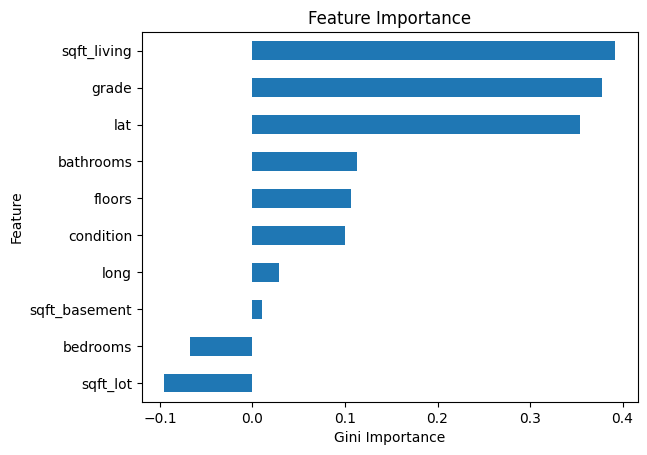

In [55]:
# this is the importance of each fetuer  
importances = Lrg.coef_ 
features = X_test.columns
feat_imp = pd.Series(importances , index= features)
feat_imp.sort_values().tail(10).plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [56]:
kn= KNN(n_neighbors=7,weights="uniform",metric="manhattan")
kn.fit(X_train , y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=7)

In [57]:
# train score
kn.score(X_train,y_train)

0.8797312495750873

In [58]:
y_kn_pred = kn.predict(X_test)

In [59]:
kn.score(X_test,y_test)

0.8478127468017891

In [60]:
# r2_score
r2=r2_score(y_test , y_kn_pred)
print("Test Accuracy:", round(r2, 4))

Test Accuracy: 0.8478


In [61]:
# mean_absolute_error
mae=mean_absolute_error(y_test , y_kn_pred)
print("Test Accuracy:", round(mae, 4))

Test Accuracy: 0.2836


In [62]:
# cross_val_score
cv=cross_val_score(kn, X, y,cv=10) 
cv

array([0.83339941, 0.84849208, 0.84293084, 0.83454251, 0.8277204 ,
       0.84937209, 0.84447842, 0.84449413, 0.84658322, 0.8308452 ])

In [63]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8402858295918781


Text(0.5, 1.0, 'KNN')

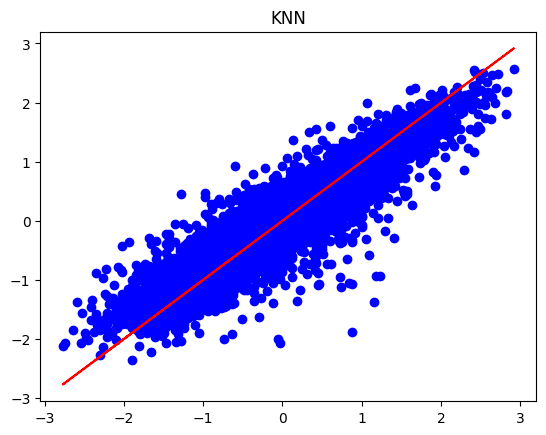

In [64]:
# KNN graph 
plt.scatter(y_test,y_kn_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("KNN")